# Método $\epsilon$-restrito

Considere o problema biobjetivo representado pelo modelo a seguir.

Problema da dieta:

\begin{equation*}
Min\;z_1=20x_1+10x_2
\end{equation*}

\begin{equation*}
Min\;z_2=60x_1+90x_2
\end{equation*}

\begin{equation*}
s.a.\left\{\begin{matrix}
x_1+x_2\leq 5\\
5x_1+2.5x_2\geq 5\\
2x_1+2x_2\geq 3\\
x_1, x_2 \geq 0
\end{matrix}\right.
\end{equation*}

Resolva-o aplicando o método da soma ponderada e o método do ε-restrito, apresentando, nos
dois casos, alguns pontos da fronteira de Pareto. Faça a implementação usando, por exemplo, a
linguagem de programação JULIA, em conjunto com o solver Cplex ou Gurobi.

Siga os passos apresentados nos slides 59-65 e 79-82 da minha aula da semana passada, dia 10.

## 1. Determinando os lexográficos

In [7]:
## Importar pacotes necessários
using JuMP, CPLEX, Plots

## Estabelecer o modelo para otimização
model = Model(CPLEX.Optimizer)

# Matriz Custos objetivos
C = [20 60;
    10 90]

# Matriz Parâmetros (valores negativas: Restrições >=)
A = [1 1 5;
    -5 -2.5 -5;
    -2 -2 -3]

# Função z1
# -----------------------------------------------------------------------------
# Variáveis de decisão
@variable(model, x[1:2] >= 0)

# Funções objetivos
@objective(model, Min, C[:,1]'x)

# Restrições
@constraint(model, restr[i=1:3], A[i,1:2]'x <= A[i,end])

# Imprimir modelo
print(model)

# Resolva o modelo
optimize!(model);

# Imprimir solução ótima
print("\n Solução ótima: ")
println(value.(x))

# Valor objetivo (z1-):
println("z1-: ", C[:,1]'value.(x))
R = C[:,1]'value.(x)

# Valor objetivo (z2+):
println("z2+: ", C[:,2]'value.(x))
R = [R C[:,2]'value.(x)]

# Limpar o modelo - Reset das variáreis
empty!(model)

# Função z2
# -----------------------------------------------------------------------------
# Variáveis de decisão
@variable(model, x[1:2] >= 0)

# Funções objetivos
@objective(model, Min, C[:,2]'x)

# Restrições
@constraint(model, restr[i=1:3], A[i,1:2]'x <= A[i,end])

# Imprimir modelo
print(model)

# Resolva o modelo
optimize!(model)

# Imprimir solução ótima
print("\n\n Solução ótima: ")
println(value.(x))

# Valor da função
# Valor objetivo (z1+):
println("z1+: ", C[:,1]'value.(x))
R = [R C[:,1]'value.(x)]

# Valor objetivo (z2-):
println("z1-: ", C[:,2]'value.(x))
R = [R C[:,2]'value.(x)]
# -----------------------------------------------------------------------------

# Limpar o modelo - Reset das variáreis
empty!(model)

# Matriz dos lexigráficos
R = [R[1,1:2]'; 
    R[1,3:4]']'

CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
Tried aggregator 1 time.
No LP presolve or aggregator reductions.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =            20.000000

 Solução ótima: [0.5, 1.0]
z1-: 20.0
z2+: 120.0


CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
Tried aggregator 1 time.
No LP presolve or aggregator reductions.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =            60.000000


 Solução ótima: [1.5, 0.0]
z1+: 30.0
z1-: 90.0


2×2 adjoint(::Matrix{Float64}) with eltype Float64:
  20.0  30.0
 120.0  90.0

<div align="center">

![Pontos Lexográficos](https://raw.githubusercontent.com/Daniel-C-Fernandes/julia/refs/heads/main/selmat/lexograficos.png)

</div>

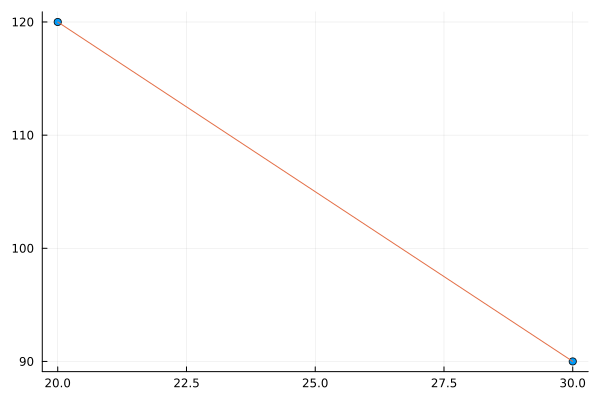

In [8]:
scatter(R[1,:],R[2,:], legend = false)
plot!(R[1,:],R[2,:])

CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 0 columns.
Reduced LP has 3 rows, 2 columns, and 6 nonzeros.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =            90.003000


CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 0 columns.
Reduced LP has 3 rows, 2 columns, and 6 nonzeros.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =            90.003000


CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 0 columns.
Reduced LP has 3 rows, 2 columns, and 6 nonzeros.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =            90.003000


CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 0 columns.
Reduced LP has 3 rows, 2 columns, and 6 nonzeros.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =            90.003000


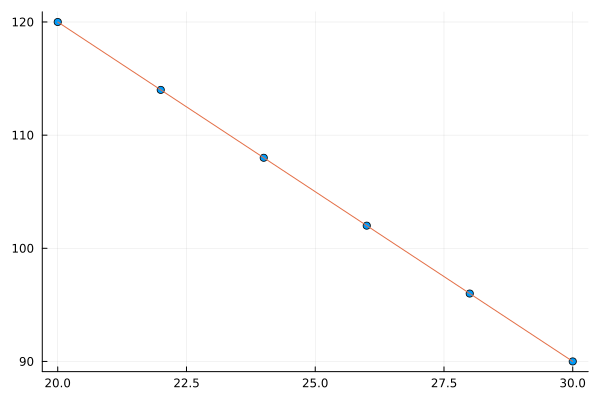

In [ ]:
# Número de divisões de z1
n = 5

# Valor de epsilon
epsilon = (R[1,2]-R[1,1])/n

M = 10^-4

for repeticao = 1:(n-1)
    # Limpar o modelo - Reset das variáreis
    empty!(model)

    # Função z2
    # -----------------------------------------------------------------------------
    # Variáveis de decisão
    @variable(model, x[1:2] >= 0)

    # Função objetivo z2 com adição de M*z1
    @objective(model, Min, C[:,2]'x + M*C[:,1]'x)

    gap = epsilon*repeticao

    # Restrições
    @constraint(model, restr[i=1:3], A[i,1:2]'x <= A[i,end])
    @constraint(model, restr2, C[:,1]'x <= R[1,end] - gap)

    # Imprimir modelo
    print(model)

    # Resolva o modelo (sem dar retorno)
    optimize!(model);

    # Matriz resultante: Primeiras colunas, Função ótima, último lexográfico 
    R = [ R[:,1] [R[1,end] - gap; C[:,2]'value.(x)] R[:,2:end]]
    # -----------------------------------------------------------------------------
end

# Gráfico
scatter(R[1,:],R[2,:], legend = false)
plot!(R[1,:],R[2,:])